In [246]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis, mode
from scipy.stats import mode as stats_mode
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


# 1. Data loading and Exploration

In [247]:
df = pd.read_csv("train.csv")

print("\nFirst 5 rows:")
df.head()



First 5 rows:


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [248]:
print("Dataset Info:")
df.info()


print("\nBasic Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  

In [249]:
df["price_range"].unique()

array([1, 2, 3, 0])

# 2.Data Cleaning and Preprocessing:

In [250]:
print("Missing values:")

df.isnull().sum()

Missing values:


battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### NOTE: Every column is complete, no missing values.

In [251]:
''' Transform categorical data into numerical'''

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_cols.tolist())
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_cols.tolist())

Categorical columns: []
Numerical columns: ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [252]:
df.duplicated().sum()

np.int64(0)

#### NOTE:After checking the dataset, all columns are numerical. Therefore, no encoding or transformation of categorical variables was necessary.

# 3. Statistical Analysis with NumPy and SciPy

In [253]:
# 1. battery_power 
print(" Battery power:\n")
mean = df["battery_power"].mean()
print(f"Mean:",mean)
median = df["battery_power"].median()
print(f"Median:",median)
mode = df["battery_power"].mode()
print(f"Mode:\n",mode)

 Battery power:

Mean: 1238.5185
Median: 1226.0
Mode:
 0     618
1    1589
2    1872
Name: battery_power, dtype: int64


In [254]:
summary_table = pd.DataFrame({
    "feature": ["Mean","Median","Mode","Range","Variance","Std","Skewness","Kurtosis"]})

In [255]:
numerical_cols = [c for c in numerical_cols if c != "price_range"]

for col in numerical_cols:
    col_data = df[col].to_numpy()
    mean = np.mean(col_data)
    median = np.median(col_data)
    mode_val = stats_mode(col_data,keepdims=True).mode[0]
    data_range = np.ptp(col_data)
    variance = np.var(col_data,ddof=1)
    std = np.std(col_data,ddof=1)
    skewness = skew(col_data)
    kurt = kurtosis(col_data)

    summary_table[col]=[mean, median, mode_val, data_range, variance, std, skewness, kurt]
# summary_table = summary_table.set_index('feature').T
print(summary_table.round(3))

    feature  battery_power   blue  clock_speed  dual_sim      fc  four_g  \
0      Mean       1238.518  0.495        1.522     0.509   4.310   0.522   
1    Median       1226.000  0.000        1.500     1.000   3.000   1.000   
2      Mode        618.000  0.000        0.500     1.000   0.000   1.000   
3     Range       1497.000  1.000        2.500     1.000  19.000   1.000   
4  Variance     193088.360  0.250        0.666     0.250  18.848   0.250   
5       Std        439.418  0.500        0.816     0.500   4.341   0.500   
6  Skewness          0.032  0.020        0.178    -0.038   1.019  -0.086   
7  Kurtosis         -1.224 -2.000       -1.323    -1.999   0.273  -1.993   

   int_memory  m_dep  mobile_wt  ...      pc   px_height    px_width  \
0      32.046  0.502    140.249  ...   9.916     645.108    1251.516   
1      32.000  0.500    141.000  ...  10.000     564.000    1247.000   
2      27.000  0.100    182.000  ...  10.000     347.000     874.000   
3      62.000  0.900    120

In [256]:
if 'feature' in summary_table.columns:
    summary_table = summary_table.set_index('feature').T
else:
    # it already was indexed before
    summary_table = summary_table.T

In [257]:
summary_table   

feature,Mean,Median,Mode,Range,Variance,Std,Skewness,Kurtosis
battery_power,1238.51850,1226.0,618.0,1497.0,1.930884e+05,439.418206,0.031875,-1.224084
blue,0.49500,0.0,0.0,1.0,2.501001e-01,0.500100,0.020001,-1.999600
clock_speed,1.52225,1.5,0.5,2.5,6.658629e-01,0.816004,0.177951,-1.323109
dual_sim,0.50950,1.0,1.0,1.0,2.500348e-01,0.500035,-0.038007,-1.998555
fc,4.30950,3.0,0.0,19.0,1.884813e+01,4.341444,1.019046,0.273386
four_g,0.52150,1.0,1.0,1.0,2.496626e-01,0.499662,-0.086080,-1.992590
int_memory,32.04650,32.0,27.0,62.0,3.292670e+02,18.145715,0.057846,-1.216034
m_dep,0.50175,0.5,0.1,0.9,8.318353e-02,0.288416,0.089015,-1.274164
mobile_wt,140.24900,141.0,182.0,120.0,1.253136e+03,35.399655,0.006553,-1.210351
n_cores,4.52050,4.0,4.0,7.0,5.234197e+00,2.287837,0.003625,-1.229676


In [258]:
df["resolution_px"] = df["px_height"].dropna()* df["px_width"].dropna()
numerical_cols.append("resolution_px")
cheap_phones = df[df["price_range"]==0]
expensive_phones = df[df["price_range"]==3]


### 1. Is there a difference in the average battery power between cheap and expensive phones?
- H₀ (null hypothesis): there’s no difference in battery power between the groups.
- H₁ (alternative): there is a difference.

In [259]:
print("Hypothesis Test 1: Battery power (Cheap vs Expensive phones)")
print("H0: Mean battery power(cheap) = Mean battery power (expensive)")
print("H1: Mean battery power(cheap) ≠  Mean battery power(expensive)")
print("Significance level: α = 0.05")

bp_cheap = cheap_phones["battery_power"]
bp_exp = expensive_phones["battery_power"]
t_stat,p_value = stats.ttest_ind(bp_cheap,bp_exp)
print("\nResults:")
print(f"T-statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("There is a significant difference bwetween these two groups.")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no significant difference between these two groups")

Hypothesis Test 1: Battery power (Cheap vs Expensive phones)
H0: Mean battery power(cheap) = Mean battery power (expensive)
H1: Mean battery power(cheap) ≠  Mean battery power(expensive)
Significance level: α = 0.05

Results:
T-statistics: -10.0743
p-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
There is a significant difference bwetween these two groups.


### 2. Is there a difference in the average RAM between cheap and expensive phones?
- H₀ (null hypothesis): there’s no difference in RAM between the groups.
- H₁ (alternative): there is a difference.

In [260]:
print("Hypothesis Test 1: RAM (Cheap vs Expensive phones)")
print("H0: Mean RAM (cheap) ≠  Mean RAM (expensive)")
print("Significance level: α = 0.05")

ram_cheap = cheap_phones["ram"]
ram_exp = expensive_phones["ram"]
t_stat,p_value = stats.ttest_ind(ram_cheap,ram_exp)
print("\nResults:")
print(f"T-statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("There is a significant difference bwetween these two groups.")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no significant difference between these two groups")

Hypothesis Test 1: RAM (Cheap vs Expensive phones)
H0: Mean RAM (cheap) ≠  Mean RAM (expensive)
Significance level: α = 0.05

Results:
T-statistics: -111.3731
p-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
There is a significant difference bwetween these two groups.


### 3. Is there a difference in the average Resolution between cheap and expensive phones?
- H₀ (null hypothesis): there’s no difference in px_height between the groups.
- H₁ (alternative): there is a difference.

In [261]:
print("Hypothesis Test 1: Pixel Resolution (Cheap vs Expensive phones)")
print("H0: Mean resolution ≠  Mean resolution (expensive)")
print("Significance level: α = 0.05")

res_cheap = cheap_phones["resolution_px"]
res_exp = expensive_phones["resolution_px"]
t_stat,p_value = stats.ttest_ind(res_cheap,res_exp)
print("\nResults:")
print(f"T-statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("There is a significant difference bwetween these two groups.")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no significant difference between these two groups")

Hypothesis Test 1: Pixel Resolution (Cheap vs Expensive phones)
H0: Mean resolution ≠  Mean resolution (expensive)
Significance level: α = 0.05

Results:
T-statistics: -8.9527
p-value: 0.000000

Conclusion: Reject H0 (p < 0.05)
There is a significant difference bwetween these two groups.


### 4. Is there a difference in having bluetooth between cheap and expensive phones?
- H₀ (null hypothesis): there’s no difference in having bluetooth between the groups.
- H₁ (alternative): there is a difference.

In [262]:
print("Hypothesis Test 1: Bluetooth (Cheap vs Expensive phones)")
print("H0: Mean bluetooth ≠  Mean bluetooth (expensive)")
print("Significance level: α = 0.05")

blue_cheap = cheap_phones["blue"]
blue_exp = expensive_phones["blue"]
t_stat,p_value = stats.ttest_ind(blue_cheap,blue_exp)
print("\nResults:")
print(f"T-statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("There is a significant difference bwetween these two groups.")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no significant difference between these two groups")

Hypothesis Test 1: Bluetooth (Cheap vs Expensive phones)
H0: Mean bluetooth ≠  Mean bluetooth (expensive)
Significance level: α = 0.05

Results:
T-statistics: -1.0114
p-value: 0.312050

Conclusion: Fail to reject H0 (p >= 0.05)
There is no significant difference between these two groups


### 5. Is there a difference in having dual sim card between cheap and expensive phones?
- H₀ (null hypothesis): there’s no difference in having dual sim card between the groups.
- H₁ (alternative): there is a difference.

In [263]:
print("Hypothesis Test 1: Bluetooth (Cheap vs Expensive phones)")
print("H0: Having dual sim_card ≠  Having dual sim card (expensive)")
print("Significance level: α = 0.05")

dual_cheap = cheap_phones["dual_sim"]
dual_exp = expensive_phones["dual_sim"]
t_stat,p_value = stats.ttest_ind(dual_cheap,dual_exp)
print("\nResults:")
print(f"T-statistics: {t_stat:.4f}")
print(f"p-value: {p_value:.6f}")

alpha = 0.05
if p_value < alpha:
    print(f"\nConclusion: Reject H0 (p < {alpha})")
    print("There is a significant difference bwetween these two groups.")
else:
    print(f"\nConclusion: Fail to reject H0 (p >= {alpha})")
    print("There is no significant difference between these two groups")

Hypothesis Test 1: Bluetooth (Cheap vs Expensive phones)
H0: Having dual sim_card ≠  Having dual sim card (expensive)
Significance level: α = 0.05

Results:
T-statistics: -0.9486
p-value: 0.343060

Conclusion: Fail to reject H0 (p >= 0.05)
There is no significant difference between these two groups


#### Feature-target correlation

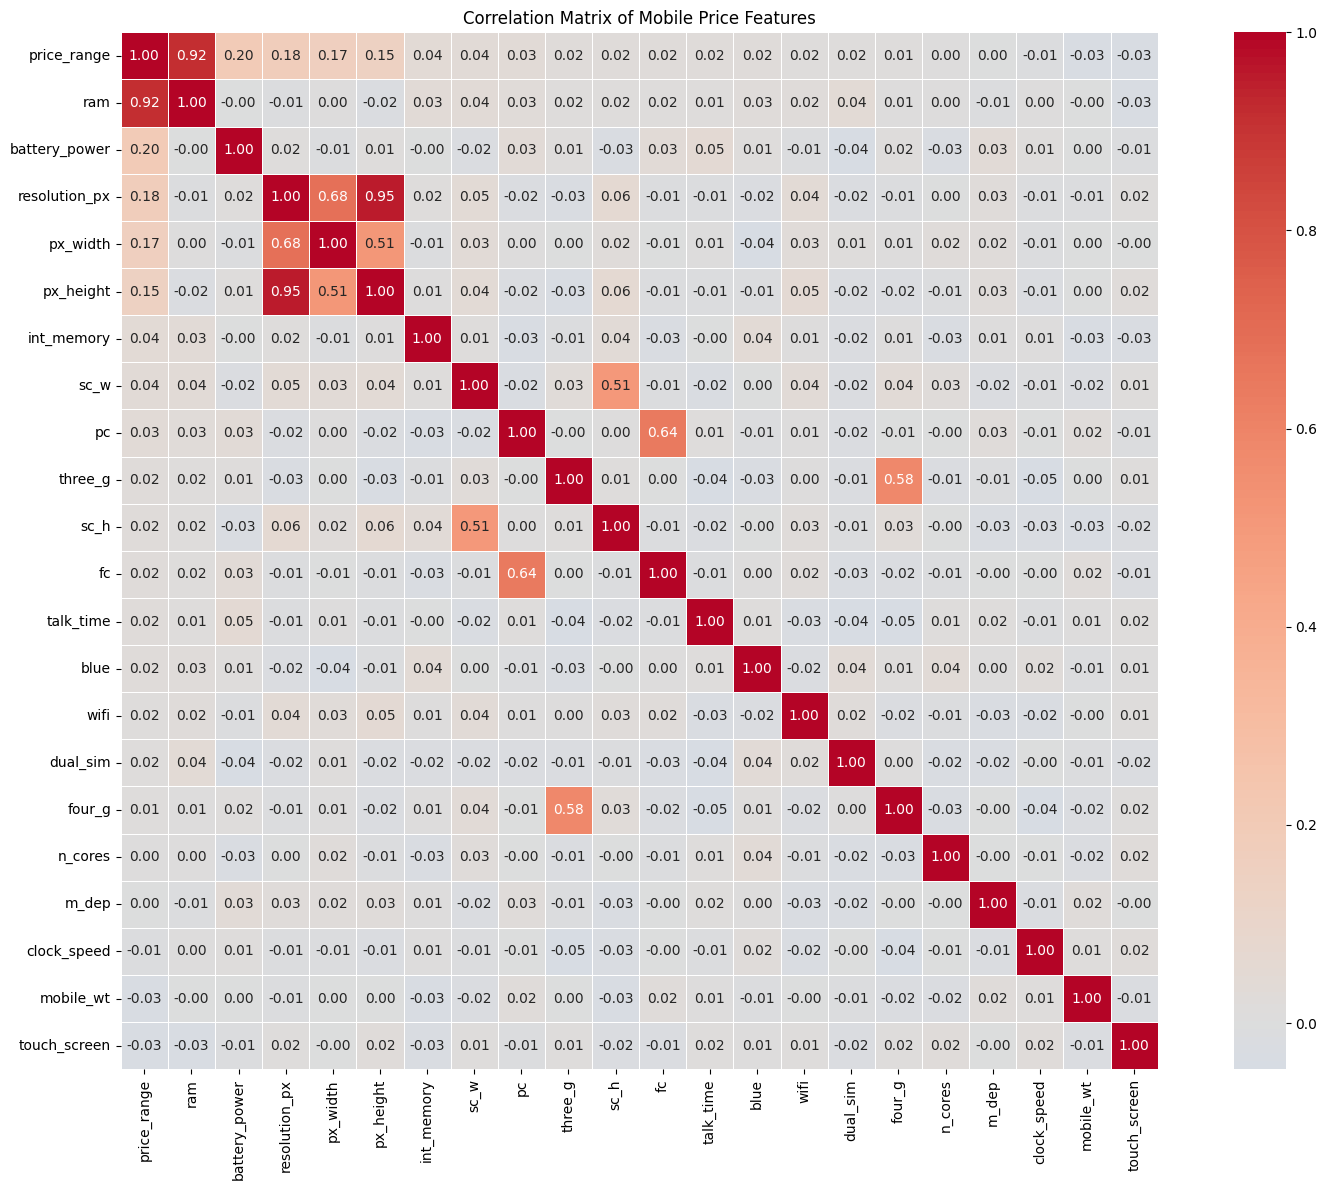

In [264]:
# Pearson correlation
correlation_matrix = df.corr(numeric_only=True)

# correlations with price_range
price_corr = correlation_matrix["price_range"].sort_values(ascending=False)
sorted_cols = price_corr.index
correlation_matrix = correlation_matrix.loc[sorted_cols, sorted_cols]

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',fmt=".2f", center=0, square=True, linewidths=0.5)
plt.title('Correlation Matrix of Mobile Price Features')
plt.tight_layout()
plt.show()


In [265]:
# top 10 feautures
price_corr = df.corr(numeric_only=True)["price_range"].abs().sort_values(ascending=False)
top_features = price_corr.head(10).index
top_features


Index(['price_range', 'ram', 'battery_power', 'resolution_px', 'px_width',
       'px_height', 'int_memory', 'sc_w', 'pc', 'touch_screen'],
      dtype='object')

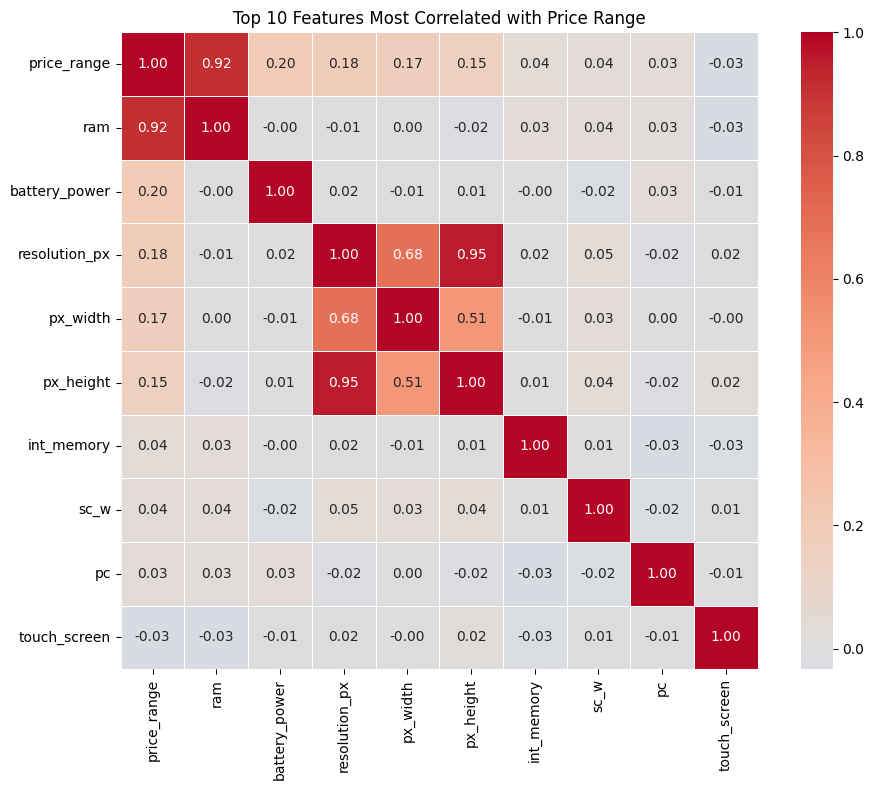

In [266]:
# Correlation matrix for 10 top features
top_corr_matrix = df[top_features.to_list()].corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5, fmt=".2f")

plt.title("Top 10 Features Most Correlated with Price Range")
plt.tight_layout()
plt.show()

/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_22566/1574800566.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y=feature, data=df, palette="pastel")


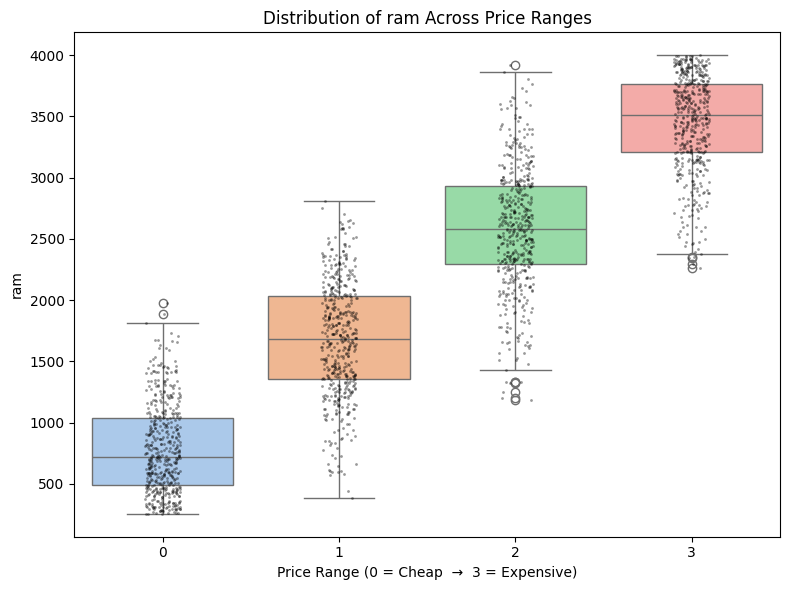

In [267]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose which feature to visualize
feature = "ram"     # you can also try "px_width" or "resolution_px"

plt.figure(figsize=(8, 6))
sns.boxplot(x="price_range", y=feature, data=df, palette="pastel")

# Optional: add the real data points (helps you "see" overlap)
sns.stripplot(x="price_range", y=feature, data=df, color="black", size=2, jitter=True, alpha=0.4)

plt.title(f"Distribution of {feature} Across Price Ranges")
plt.xlabel("Price Range (0 = Cheap  →  3 = Expensive)")
plt.ylabel(feature)
plt.tight_layout()
plt.show()


/var/folders/zs/lhn3v0dx0v32gt7hm_r0m1zc0000gn/T/ipykernel_22566/169679855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="price_range", y=feature, data=df, palette="pastel")


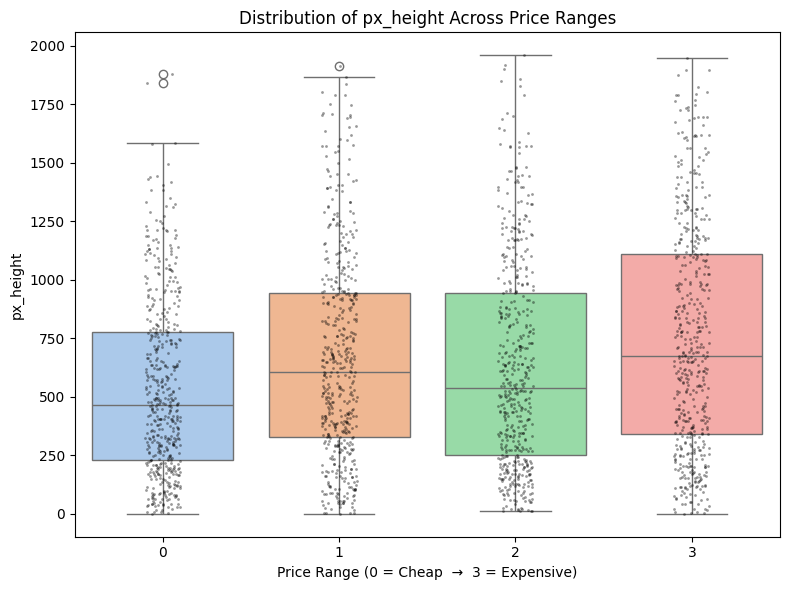

In [268]:
import seaborn as sns
import matplotlib.pyplot as plt

# Choose which feature to visualize
feature = "px_height"     # you can also try "px_width" or "resolution_px"

plt.figure(figsize=(8, 6))
sns.boxplot(x="price_range", y=feature, data=df, palette="pastel")

# Optional: add the real data points (helps you "see" overlap)
sns.stripplot(x="price_range", y=feature, data=df, color="black", size=2, jitter=True, alpha=0.4)

plt.title(f"Distribution of {feature} Across Price Ranges")
plt.xlabel("Price Range (0 = Cheap  →  3 = Expensive)")
plt.ylabel(feature)
plt.tight_layout()
plt.show()


# 4. Insight Synthesis and Conclusion:

## Conclusions: 
- Key determinant: RAM is by far the strongest driver of price tier (corr ≈ 0.92, huge t-stat). This alone explains most of the separation between cheap vs. expensive.

- Secondary drivers: Battery power and resolution (px_height×px_width) show moderate positive relationships with price (corr ≈ 0.2 and 0.18; both highly significant).

- Weak/none: Bluetooth and dual-SIM show no meaningful difference between cheap and expensive groups (p ≈ 0.31–0.34). These features don’t help pricing much in this dataset.